# Regressão III - Tarefa

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm # A função do Lowess está aqui
from scipy.interpolate import interp1d # Vamos usar essa interpolação
from io import StringIO

In [3]:
df = pd.read_csv('./input/prev_renda_II.csv', index_col=0)
print(df.shape)
df.head(10)

(750000, 13)


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
2015-01-01,11433,M,S,S,0,Pensionista,Superior completo,Casado,Casa,56,NaN,2.0,1847.48
2015-01-01,9928,F,S,S,0,Assalariado,Superior completo,Casado,Casa,41,19.438356,2.0,14162.81
2015-01-01,5073,F,S,S,0,Servidor público,Médio,Casado,Casa,52,7.134247,2.0,1981.07
2015-01-01,14570,F,S,S,0,Pensionista,Superior completo,Solteiro,Casa,50,NaN,1.0,7806.22


In [4]:
# Ajustando dados e index
df = df.reset_index()
df.drop(columns=['index'], inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## 1 - Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [6]:
df.isnull().sum()

data_ref                      0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [7]:
# Obtendo a média associada ao tempo de emprego

mean = df.tempo_emprego.mean()
print(f'--> A média do tempo de emprego é: {mean:.2f}.')

df[['tempo_emprego']].describe().transpose()

--> A média do tempo de emprego é: 7.75.


,count,mean,std,min,25%,50%,75%,max
tempo_emprego,624240.0,7.746165,6.684181,0.117808,3.049315,6.046575,10.180822,42.906849


In [8]:
# Substituindo os valores missing
# Somente a variável tempo_emprego possui valores missing, 
# logo, substituiremos pela média (mean)

df.fillna(mean, inplace=True)
df.isna().sum()

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

##### Verificando a descrição dos dados

In [10]:
# Numéricos
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,750000.0,0.433267,0.738516,0.000000,0.000000,0.000000,1.000000,1.400000e+01
idade,750000.0,43.796907,11.229454,22.000000,34.000000,43.000000,53.000000,6.800000e+01
tempo_emprego,750000.0,7.746165,6.098082,0.117808,3.635616,7.471233,9.093151,4.290685e+01
qt_pessoas_residencia,750000.0,2.212315,0.903041,1.000000,2.000000,2.000000,3.000000,1.500000e+01
renda,750000.0,23977.420954,90399.725246,95.300000,3469.370000,7929.980000,18647.160000,6.802261e+06


In [11]:
# Categóricos
df.select_dtypes('object').describe().T

,count,unique,top,freq
data_ref,750000,15,2015-01-01,50000
sexo,750000,2,F,504418
posse_de_veiculo,750000,2,N,457678
posse_de_imovel,750000,2,S,503485
tipo_renda,750000,5,Assalariado,385926
educacao,750000,5,Médio,447849
estado_civil,750000,5,Casado,526279
tipo_residencia,750000,6,Casa,674054


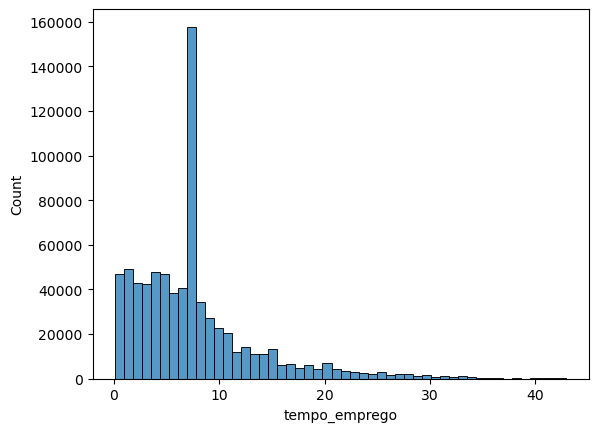

In [12]:
# É válido destacar que tendo substituído os valores missing por um dados específico, 
# a contagem dos dados fica com uma concentração irreal sobre tal valor.

sns.histplot(df, x='tempo_emprego', bins=50);

## 2 - Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [14]:
print(df[['data_ref']].dtypes)

data_ref    object
dtype: object


In [15]:
# Modificando para datetime
df.data_ref = pd.to_datetime(df.data_ref)
df[['data_ref']].dtypes

data_ref    datetime64[ns]
dtype: object

In [16]:
# Selecionando os três últimos meses

months_test = df.data_ref.unique()[-3:]
print(months_test, '\n')

# Obtendo os dados de teste
df_test = df[df['data_ref'] >= months_test[0]]
print(df_test.shape)
df_test.head()

<DatetimeArray>
['2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00']
Length: 3, dtype: datetime64[ns] 

(150000, 13)


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
600000,2016-01-01,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
600001,2016-01-01,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35
600002,2016-01-01,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
600003,2016-01-01,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
600004,2016-01-01,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03


In [17]:
# Os demais dados são

df_train = df[df.data_ref < months_test[0]]
print(df_train.shape)
df_train.head()

(600000, 13)


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## 3 - Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$
 - Objetivo: prever a renda.

In [19]:
# Obtendo variáveis dummy
df_dummy = pd.get_dummies(df_train, drop_first=False)
colunas = [_.replace(' ', '_') for _ in df_dummy.columns]
print(colunas)

df_dummy.columns = colunas
print(df_dummy.shape)
df_dummy.head(2)

['data_ref', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N', 'posse_de_veiculo_S', 'posse_de_imovel_N', 'posse_de_imovel_S', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor_público', 'educacao_Fundamental', 'educacao_Médio', 'educacao_Pós_graduação', 'educacao_Superior_completo', 'educacao_Superior_incompleto', 'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel', 'tipo_residencia_Casa', 'tipo_residencia_Com_os_pais', 'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio', 'tipo_residencia_Governamental']
(600000, 33)


,data_ref,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_S,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,0,47,16.717808,2.0,11138.14,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-01,0,30,9.600000,2.0,2424.81,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [20]:
# Selecionando as variáveis explicativas 

exp_vars = list(df_dummy.columns)
exp_vars.remove('data_ref')
exp_vars.remove('renda')
exp_vars = [_.replace(' ', '_') for _ in exp_vars]

# Gerando a string para o patsy
string = ' + '.join(exp_vars)
string

'qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + sexo_F + sexo_M + posse_de_veiculo_N + posse_de_veiculo_S + posse_de_imovel_N + posse_de_imovel_S + tipo_renda_Assalariado + tipo_renda_Bolsista + tipo_renda_Empresário + tipo_renda_Pensionista + tipo_renda_Servidor_público + educacao_Fundamental + educacao_Médio + educacao_Pós_graduação + educacao_Superior_completo + educacao_Superior_incompleto + estado_civil_Casado + estado_civil_Separado + estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + tipo_residencia_Aluguel + tipo_residencia_Casa + tipo_residencia_Com_os_pais + tipo_residencia_Comunitário + tipo_residencia_Estúdio + tipo_residencia_Governamental'

##### Regressão sem transformação aplicada nas variáveis

In [22]:
reg = smf.ols('renda ~ ' + string, data=df_dummy).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     7789.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:22   Log-Likelihood:            -7.6744e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599974   BIC:                         1.535e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -3.394e+13   1.37e+14     -0.248      0.804   -3.02e+14    2.34e+14
sexo_F[T.True]                        -1.989e+13   7.64e+13     -0.260      0.795    -1.7e+14     1.3e+14
sexo_M[T.True]                        -1.989e+13   7.64e+13     -0.260      0.795    -1.7e+14     1.3e+14
posse_de_veiculo_N[T.True]            -1.998e+13   7.58e+13     -0.264      0.792   -1.69e+14    1.29e+14
posse_de_veiculo_S[T.True]            -1.998e+13   7.58e+13     -0.264      0.792   -1.69e+14    1.29e+14
posse_de_imovel_N[T.True]             -1.981e+13   7.64e+13     -0.259      0.795   -1.69e+14     1.3e+14
posse_de_imovel_S[T.True]             -1.981e+13   7.64e+13     -0.259      0.795   -1.69e+14     1.3e+14
tipo_renda_Assalariado[T.True]         2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Bolsista[T.True]            2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Empresário[T.True]          2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Pensionista[T.True]         2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Servidor_público[T.True]    2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
educacao_Fundamental[T.True]          -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Médio[T.True]                -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Pós_graduação[T.True]        -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Superior_completo[T.True]    -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Superior_incompleto[T.True]  -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
estado_civil_Casado[T.True]            1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_Separado[T.True]          1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_Solteiro[T.True]          1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_União[T.True]             1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_Viúvo[T.True]             1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
tipo_residencia_Aluguel[T.True]       -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_residencia_Casa[T.True]          -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_residencia_Com_os_pais[T.True]   -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_residencia_Comunitário[T.True]   -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_resi

> **Com base nos p-values podemos modificar a regressão e considerar apenas as variáveis `idade` e `tempo_emprego`. Vejamos como o R-quadrado ajustado é alterado em função dessa modificação.**

In [24]:
reg_filtered = smf.ols('renda ~ idade + tempo_emprego', data=df_dummy).fit()
reg_filtered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 9.287e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:22   Log-Likelihood:            -7.6778e+06
No. Observations:              600000   AIC:                         1.536e+07
Df Residuals:                  599997   BIC:                         1.536e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.458e+04    455.088    -54.013      0.000   -2.55e+04   -2.37e+04
idade          -223.2496     10.373    -21.523      0.000    -243.580    -202.919
tempo_emprego  8061.2597     19.103    421.982      0.000    8023.818    8098.702
==============================================================================
Omnibus:                  1426069.337   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28645863471.103
Skew:                          24.035   Prob(JB):                         0.00
Kurtosis:                    1072.357   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Como podemos notar, não houve uma queda muito grande (diferença de $0.9$%) no valor de R-quadrado e R-quadrado ajustado.**


Um fator interessante a ser destacado é a diferença nos valores de P-value quando consideramos o `drop_first` na geração das variáveis `dummie`. Para evidenciar essa diferença, vamos rodar o modelo de regressão novamente considerando o `drop_first=True` (quando categorizamos via `Patsy` isso também ocorre).

In [27]:
# Obtendo variáveis dummy
df_dummy = pd.get_dummies(df_train, drop_first=False)
colunas = [_.replace(' ', '_') for _ in df_dummy.columns]
df_dummy.columns = colunas
# Selecionando as variáveis explicativas 
exp_vars = list(df_dummy.columns)
exp_vars.remove('data_ref')
exp_vars.remove('renda')
exp_vars = [_.replace(' ', '_') for _ in exp_vars]
# Gerando a string para o patsy
string_test = ' + '.join(exp_vars)

# Aplicando a regressão e verificando a diferença com o drop_first=True
reg = smf.ols('renda ~ ' + string_test, data=df_dummy).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     7789.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:25   Log-Likelihood:            -7.6744e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599974   BIC:                         1.535e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -3.394e+13   1.37e+14     -0.248      0.804   -3.02e+14    2.34e+14
sexo_F[T.True]                        -1.989e+13   7.64e+13     -0.260      0.795    -1.7e+14     1.3e+14
sexo_M[T.True]                        -1.989e+13   7.64e+13     -0.260      0.795    -1.7e+14     1.3e+14
posse_de_veiculo_N[T.True]            -1.998e+13   7.58e+13     -0.264      0.792   -1.69e+14    1.29e+14
posse_de_veiculo_S[T.True]            -1.998e+13   7.58e+13     -0.264      0.792   -1.69e+14    1.29e+14
posse_de_imovel_N[T.True]             -1.981e+13   7.64e+13     -0.259      0.795   -1.69e+14     1.3e+14
posse_de_imovel_S[T.True]             -1.981e+13   7.64e+13     -0.259      0.795   -1.69e+14     1.3e+14
tipo_renda_Assalariado[T.True]         2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Bolsista[T.True]            2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Empresário[T.True]          2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Pensionista[T.True]         2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
tipo_renda_Servidor_público[T.True]    2.548e+14   3.03e+14      0.841      0.401   -3.39e+14    8.49e+14
educacao_Fundamental[T.True]          -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Médio[T.True]                -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Pós_graduação[T.True]        -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Superior_completo[T.True]    -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
educacao_Superior_incompleto[T.True]  -2.469e+14   3.63e+14     -0.680      0.497   -9.59e+14    4.65e+14
estado_civil_Casado[T.True]            1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_Separado[T.True]          1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_Solteiro[T.True]          1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_União[T.True]             1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
estado_civil_Viúvo[T.True]             1.404e+14   6.88e+14      0.204      0.838   -1.21e+15    1.49e+15
tipo_residencia_Aluguel[T.True]       -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_residencia_Casa[T.True]          -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_residencia_Com_os_pais[T.True]   -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_residencia_Comunitário[T.True]   -5.463e+13   3.16e+14     -0.173      0.863   -6.73e+14    5.64e+14
tipo_resi

In [28]:
# O mesmo ocorre quando fazermos a categorização direto no patsy
res = smf.ols('renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos'
       '+ C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade'
       '+ tempo_emprego + qt_pessoas_residencia', data=df_train).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     8113.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:42   Log-Likelihood:            -7.6744e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599975   BIC:                         1.535e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -4.335e+04   4527.299     -9.574      0.000   -5.22e+04   -3.45e+04
C(sexo)[T.M]                        -3021.9626    264.887    -11.408      0.000   -3541.134   -2502.792
C(posse_de_veiculo)[T.S]            -1186.8729    251.890     -4.712      0.000   -1680.570    -693.176
C(posse_de_imovel)[T.S]              6569.4618    246.391     26.663      0.000    6086.543    7052.380
C(tipo_renda)[T.Bolsista]           -4.039e+04   4982.296     -8.107      0.000   -5.02e+04   -3.06e+04
C(tipo_renda)[T.Empresário]          2565.3828    284.273      9.024      0.000    2008.218    3122.548
C(tipo_renda)[T.Pensionista]        -2.522e+04    405.282    -62.234      0.000    -2.6e+04   -2.44e+04
C(tipo_renda)[T.Servidor público]    -661.6150    418.401     -1.581      0.114   -1481.667     158.437
C(educacao)[T.Médio]                -3749.1941   1063.756     -3.524      0.000   -5834.121   -1664.267
C(educacao)[T.Pós graduação]         7769.8817   3621.946      2.145      0.032     670.984    1.49e+04
C(educacao)[T.Superior completo]      140.8267   1075.127      0.131      0.896   -1966.389    2248.042
C(educacao)[T.Superior incompleto]   4990.4441   1202.838      4.149      0.000    2632.920    7347.968
C(estado_civil)[T.Separado]          1379.6101   2185.265      0.631      0.528   -2903.439    5662.660
C(estado_civil)[T.Solteiro]          1.038e+04   2144.102      4.843      0.000    6181.259    1.46e+04
C(estado_civil)[T.União]             1253.6546    428.306      2.927      0.003     414.189    2093.121
C(estado_civil)[T.Viúvo]             -911.7850   2208.826     -0.413      0.680   -5241.013    3417.443
C(tipo_residencia)[T.Casa]          -2202.6818    967.575     -2.276      0.023   -4099.097    -306.267
C(tipo_residencia)[T.Com os pais]    2252.6142   1096.337      2.055      0.040     103.830    4401.399
C(tipo_residencia)[T.Comunitário]    2813.1417   1951.886      1.441      0.150   -1012.491    6638.775
C(tipo_residencia)[T.Estúdio]       -5943.2649   1630.657     -3.645      0.000   -9139.300   -2747.230
C(tipo_residencia)[T.Governamental] -6141.0097   1151.562     -5.333      0.000   -8398.033   -3883.986
qtd_filhos                          -1112.8301   2134.446     -0.521      0.602   -5296.277    3070.616
idade                                 333.3160     14.694     22.684      0.000     304.517     362.115
tempo_emprego                        7826.5637     19.771    395.868      0.000    7787.814    7865.314
qt_pessoas_residencia                 105.3327   2129.918      0.049      0.961   -4069.238    4279.903
==============================================================================
Omnibus:                  1429260.216   Durbin-Watson:                   1.946
Prob(Omnibus)

> Talvez seja interessante considerar a geração de `dummies` com o `drop_first=False`, uma vez que isso parece levar a uma análise, via P-value, mais simples. É claro que em geral é importante testar essa hipótese.

##### Regressão aplicando transformação logarítmica na variável target

In [31]:
reg_log = smf.ols('np.log(renda) ~ '+ string, data=df_dummy).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.869e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:45   Log-Likelihood:            -7.9748e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599974   BIC:                         1.595e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1.135e+09   1.44e+09      0.788      0.431   -1.69e+09    3.96e+09
sexo_F[T.True]                         7.119e+08   8.04e+08      0.885      0.376   -8.65e+08    2.29e+09
sexo_M[T.True]                         7.119e+08   8.04e+08      0.885      0.376   -8.65e+08    2.29e+09
posse_de_veiculo_N[T.True]             7.037e+08   7.98e+08      0.882      0.378    -8.6e+08    2.27e+09
posse_de_veiculo_S[T.True]             7.037e+08   7.98e+08      0.882      0.378    -8.6e+08    2.27e+09
posse_de_imovel_N[T.True]              7.116e+08   8.04e+08      0.885      0.376   -8.64e+08    2.29e+09
posse_de_imovel_S[T.True]              7.116e+08   8.04e+08      0.885      0.376   -8.64e+08    2.29e+09
tipo_renda_Assalariado[T.True]        -1.035e+09   3.19e+09     -0.324      0.746   -7.29e+09    5.22e+09
tipo_renda_Bolsista[T.True]           -1.035e+09   3.19e+09     -0.324      0.746   -7.29e+09    5.22e+09
tipo_renda_Empresário[T.True]         -1.035e+09   3.19e+09     -0.324      0.746   -7.29e+09    5.22e+09
tipo_renda_Pensionista[T.True]        -1.035e+09   3.19e+09     -0.324      0.746   -7.29e+09    5.22e+09
tipo_renda_Servidor_público[T.True]   -1.035e+09   3.19e+09     -0.324      0.746   -7.29e+09    5.22e+09
educacao_Fundamental[T.True]           5.613e+09   3.82e+09      1.468      0.142   -1.88e+09    1.31e+10
educacao_Médio[T.True]                 5.613e+09   3.82e+09      1.468      0.142   -1.88e+09    1.31e+10
educacao_Pós_graduação[T.True]         5.613e+09   3.82e+09      1.468      0.142   -1.88e+09    1.31e+10
educacao_Superior_completo[T.True]     5.613e+09   3.82e+09      1.468      0.142   -1.88e+09    1.31e+10
educacao_Superior_incompleto[T.True]   5.613e+09   3.82e+09      1.468      0.142   -1.88e+09    1.31e+10
estado_civil_Casado[T.True]           -1.116e+10   7.24e+09     -1.541      0.123   -2.53e+10    3.03e+09
estado_civil_Separado[T.True]         -1.116e+10   7.24e+09     -1.541      0.123   -2.53e+10    3.03e+09
estado_civil_Solteiro[T.True]         -1.116e+10   7.24e+09     -1.541      0.123   -2.53e+10    3.03e+09
estado_civil_União[T.True]            -1.116e+10   7.24e+09     -1.541      0.123   -2.53e+10    3.03e+09
estado_civil_Viúvo[T.True]            -1.116e+10   7.24e+09     -1.541      0.123   -2.53e+10    3.03e+09
tipo_residencia_Aluguel[T.True]        3.316e+09   3.32e+09      0.998      0.318    -3.2e+09    9.83e+09
tipo_residencia_Casa[T.True]           3.316e+09   3.32e+09      0.998      0.318    -3.2e+09    9.83e+09
tipo_residencia_Com_os_pais[T.True]    3.316e+09   3.32e+09      0.998      0.318    -3.2e+09    9.83e+09
tipo_residencia_Comunitário[T.True]    3.316e+09   3.32e+09      0.998      0.318    -3.2e+09    9.83e+09
tipo_resi

**Como podemos notar, utilizando o log(renda) fomos capazes de obter um R-quadrado ajustado maior, ou seja, o modelo é capaz de explicar uma maior variabilidade dos dados.**



In [33]:
dados = StringIO(reg_log.summary().tables[1].as_html())

tabela = pd.read_html(dados, header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4).highlight_between(
    right = .05,
    axis = 1,
    props = 'color:red',
    subset = 'P>|t|'
).set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,"1135000000,0000","1440000000,0000","0,7880","0,4310","-1690000000,0000","3960000000,0000"
sexo_F[T.True],"711900000,0000","804000000,0000","0,8850","0,3760","-865000000,0000","2290000000,0000"
sexo_M[T.True],"711900000,0000","804000000,0000","0,8850","0,3760","-865000000,0000","2290000000,0000"
posse_de_veiculo_N[T.True],"703700000,0000","798000000,0000","0,8820","0,3780","-860000000,0000","2270000000,0000"
posse_de_veiculo_S[T.True],"703700000,0000","798000000,0000","0,8820","0,3780","-860000000,0000","2270000000,0000"
posse_de_imovel_N[T.True],"711600000,0000","804000000,0000","0,8850","0,3760","-864000000,0000","2290000000,0000"
posse_de_imovel_S[T.True],"711600000,0000","804000000,0000","0,8850","0,3760","-864000000,0000","2290000000,0000"
tipo_renda_Assalariado[T.True],"-1035000000,0000","3190000000,0000","-0,3240","0,7460","-7290000000,0000","5220000000,0000"
tipo_renda_Bolsista[T.True],"-1035000000,0000","3190000000,0000","-0,3240","0,7460","-7290000000,0000","5220000000,0000"
tipo_renda_Empresário[T.True],"-1035000000,0000","3190000000,0000","-0,3240","0,7460","-7290000000,0000","5220000000,0000"


> Analisando o P-value, vamos selecionar apenas as variáveis mais relevantes, sendo elas: `qtd_filhos`, `idade`, `tempo_emprego` e `qt_pessoas_residencia`.

In [35]:
reg_log_filtered = smf.ols('np.log(renda) ~ qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia', data=df_dummy).fit()
reg_log_filtered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 1.082e+05
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:45   Log-Likelihood:            -8.0730e+05
No. Observations:              600000   AIC:                         1.615e+06
Df Residuals:                  599995   BIC:                         1.615e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.4256      0.008   1110.686      0.000       8.411       8.440
qtd_filhos                0.0006      0.004      0.177      0.860      -0.006       0.008
idade                    -0.0042      0.000    -35.756      0.000      -0.004      -0.004
tempo_emprego             0.1312      0.000    645.355      0.000       0.131       0.132
qt_pessoas_residencia     0.0099      0.003      3.392      0.001       0.004       0.016
==============================================================================
Omnibus:                      813.752   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.288
Skew:                          -0.045   Prob(JB):                    7.15e-159
Kurtosis:                       2.855   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# O novo valor de R-quadrado ajustado para o modelo sem transformação
print(f'R-quadrado ajustado do modelo com todas as variáveis: {reg.rsquared_adj:.2%}')
print(f'R-quadrado ajustado do modelo filtrado pelo P-value: {reg_filtered.rsquared_adj:.2%} \n')
print(f'O modelo filtrado é mais simples e apresenta bons valores.')
print(f'--> A diferença no R-quadrado ajustado entre os modelos é de: {(reg.rsquared_adj-reg_filtered.rsquared_adj):.2%}')

R-quadrado ajustado do modelo com todas as variáveis: 24.50%
R-quadrado ajustado do modelo filtrado pelo P-value: 23.64% 

O modelo filtrado é mais simples e apresenta bons valores.
--> A diferença no R-quadrado ajustado entre os modelos é de: 0.86%


In [37]:
# O novo valor de R-quadrado ajustado para o modelo com ajuste logarítmico
print(f'R-quadrado ajustado do modelo com todas as variáveis: {reg_log.rsquared_adj:.2%}')
print(f'R-quadrado ajustado do modelo filtrado pelo P-value: {reg_log_filtered.rsquared_adj:.2%} \n')
print(f'O modelo filtrado é mais simples e apresenta bons valores.')
print(f'--> A diferença no R-quadrado ajustado entre os modelos é de: {(reg_log.rsquared_adj-reg_log_filtered.rsquared_adj):.2%}')

R-quadrado ajustado do modelo com todas as variáveis: 43.77%
R-quadrado ajustado do modelo filtrado pelo P-value: 41.91% 

O modelo filtrado é mais simples e apresenta bons valores.
--> A diferença no R-quadrado ajustado entre os modelos é de: 1.87%


## 4 - Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [39]:
# Criando categorização
df_train['tempo_emprego_cat'], quebras = pd.qcut(df_train['tempo_emprego'], 20, duplicates='drop', retbins=True)

df_train.head()

C:\Users\duduj\AppData\Local\Temp\ipykernel_14432\4104668766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tempo_emprego_cat'], quebras = pd.qcut(df_train['tempo_emprego'], 20, duplicates='drop', retbins=True)


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat
0,2015-01-01,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(15.214, 20.216]"
1,2015-01-01,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(9.082, 10.436]"
2,2015-01-01,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.107, 9.082]"
3,2015-01-01,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(0.816, 1.458]"
4,2015-01-01,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.816, 1.458]"


In [40]:
quebras

array([ 0.11780822,  0.81643836,  1.45753425,  2.09589041,  2.91232877,
        3.63561644,  4.29863014,  4.93424658,  5.75890411,  6.62191781,
        7.47123288,  7.7461648 ,  8.10684932,  9.08219178, 10.43561644,
       12.46575342, 15.21369863, 20.21643836, 42.90684932])

In [41]:
# Criando uma tabela com valores médios 
tab = pd.DataFrame()
tab['count'] = df_train.tempo_emprego_cat.value_counts()
df_train.loc[:,'log_renda'] = np.log(df_train.renda)
tab['media_log_renda'] = df_train.groupby('tempo_emprego_cat', observed=False)['log_renda'].mean()
tab['media_tempo_emprego'] = df_train.groupby('tempo_emprego_cat', observed=False)['tempo_emprego'].mean()
tab.sort_index(inplace=True)
tab

C:\Users\duduj\AppData\Local\Temp\ipykernel_14432\1095266132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,'log_renda'] = np.log(df_train.renda)


,count,media_log_renda,media_tempo_emprego
tempo_emprego_cat,,,
"(0.11699999999999999, 0.816]",30234,8.364965,0.515042
"(0.816, 1.458]",30031,8.454323,1.125014
"(1.458, 2.096]",29736,8.569544,1.781261
"(2.096, 2.912]",30013,8.624148,2.510920
"(2.912, 3.636]",30408,8.755365,3.301180
"(3.636, 4.299]",29625,8.855078,3.987156
"(4.299, 4.934]",30109,8.903273,4.610421
"(4.934, 5.759]",29991,9.049495,5.367829
"(5.759, 6.622]",30003,9.139216,6.205546


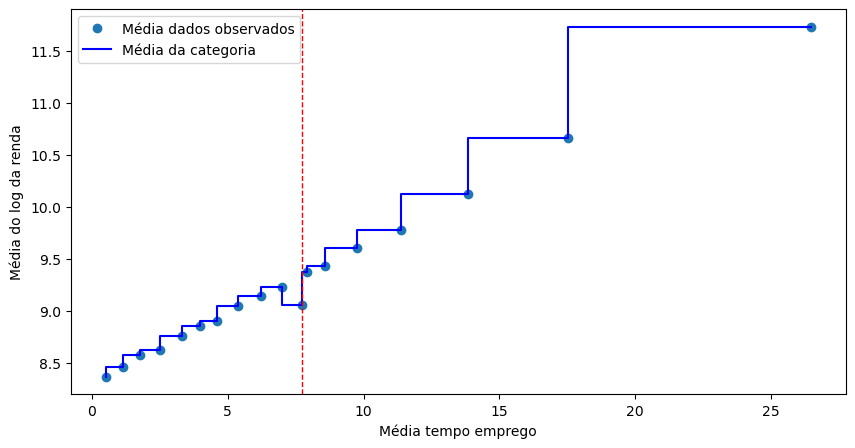

In [42]:
# Visualização gráfica

fig, ax = plt.subplots(figsize=[10,5])
ax.plot(tab['media_tempo_emprego'], tab['media_log_renda'], 'o', label='Média dados observados', alpha=1)
ax.step(tab['media_tempo_emprego'], tab['media_log_renda'], 'b-', label='Média da categoria', alpha=1)
ax.legend()
ax.axvline(x=mean, lw=1, ls='--', color='red')
ax.set_xlabel('Média tempo emprego')
ax.set_ylabel('Média do log da renda')
plt.show()

Como podemos ver, a renda tende a aumentar com o tempo de emprego. Há um ponto discrepante, no qual uma queda abrupta no gráfico pode ser identificada, isso acontece devido ao fato de termos substituído os valores faltantes da variável `tempo_emprego` pelo valor da média. A linha tracejada em vermelho descreve exatamente o valor da média que foi inserida nos dados faltantes, logo é nítido que tal substituição pode alterar a distribuição dos dados.



## 5 - Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [45]:
# Função para plot
def expected_vs_observed(data=df):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()['obs_ci_lower']
    iv_u = pred_ols.summary_frame()['obs_ci_upper']

    m_l = pred_ols.summary_frame()['mean_ci_lower']
    m_u = pred_ols.summary_frame()['mean_ci_upper']

    fig, ax = plt.subplots(figsize=[10,7])

    ax.plot(data.media_tempo_emprego, data.media_log_renda, 'o', label='Média dos observados')
    # ax.plot(data.media_tempo_emprego, data.y_true, 'b-', label='Média da simulação')
    ax.plot(data.media_tempo_emprego, res.fittedvalues, 'r--.', label='Estimativa OLS')
    ax.plot(data.media_tempo_emprego, iv_u, color='purple', ls='--', label='Banda de confiança para y')
    ax.plot(data.media_tempo_emprego, iv_l, color='purple', ls='--')
    ax.plot(data.media_tempo_emprego, m_u,'g:', label='Banda de confiança para a média')
    ax.plot(data.media_tempo_emprego, m_l, 'g:')
    ax.legend(loc='best')
    plt.show()

É possível notar que os valores médios do tempo de emprego e log(renda) possuem uma tendência linear, como visto no gráfico da média do log da renda em função da média do tempo de emprego. Em função disso, vejamos um modelo de regressão nas variáveis `media_log_renda` e `media_tempo_emprego`, é possível que tenhamos excelentes valores.

R-quadrado: 99.34%


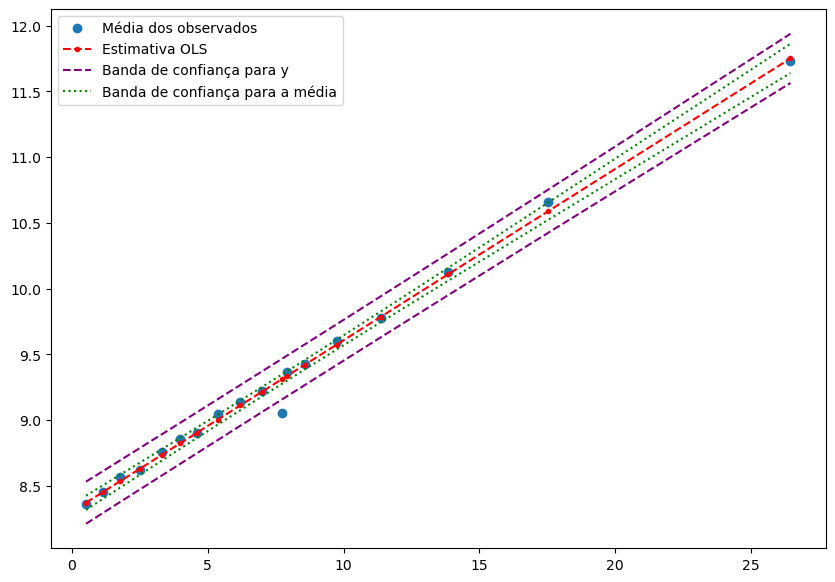

In [47]:
# Modelo
res = smf.ols('media_log_renda ~ media_tempo_emprego', data=tab).fit()
# R-quadrado
print(f'R-quadrado: {res.rsquared:.2%}')
# Gráfico
expected_vs_observed(data=tab)

Vale destacar que estamos trabalhando com as médias, logo o modelo não possui tamanha precisão nos dados originais.


#### Utilizando alguns modelos de regressão

##### Regressão segmentada

In [51]:
# valor de corte
C1 = 10

tab['T_E_1'] = (tab.media_tempo_emprego<=C1)*tab.media_tempo_emprego + (tab.media_tempo_emprego>C1)*C1
tab['T_E_2'] = (tab.media_tempo_emprego<=C1)* 0 + (tab.media_tempo_emprego>C1)*(tab.media_tempo_emprego - C1)

tab

,count,media_log_renda,media_tempo_emprego,T_E_1,T_E_2
tempo_emprego_cat,,,,,
"(0.11699999999999999, 0.816]",30234,8.364965,0.515042,0.515042,0.000000
"(0.816, 1.458]",30031,8.454323,1.125014,1.125014,0.000000
"(1.458, 2.096]",29736,8.569544,1.781261,1.781261,0.000000
"(2.096, 2.912]",30013,8.624148,2.510920,2.510920,0.000000
"(2.912, 3.636]",30408,8.755365,3.301180,3.301180,0.000000
"(3.636, 4.299]",29625,8.855078,3.987156,3.987156,0.000000
"(4.299, 4.934]",30109,8.903273,4.610421,4.610421,0.000000
"(4.934, 5.759]",29991,9.049495,5.367829,5.367829,0.000000
"(5.759, 6.622]",30003,9.139216,6.205546,6.205546,0.000000


R-quadrado: 99.35%


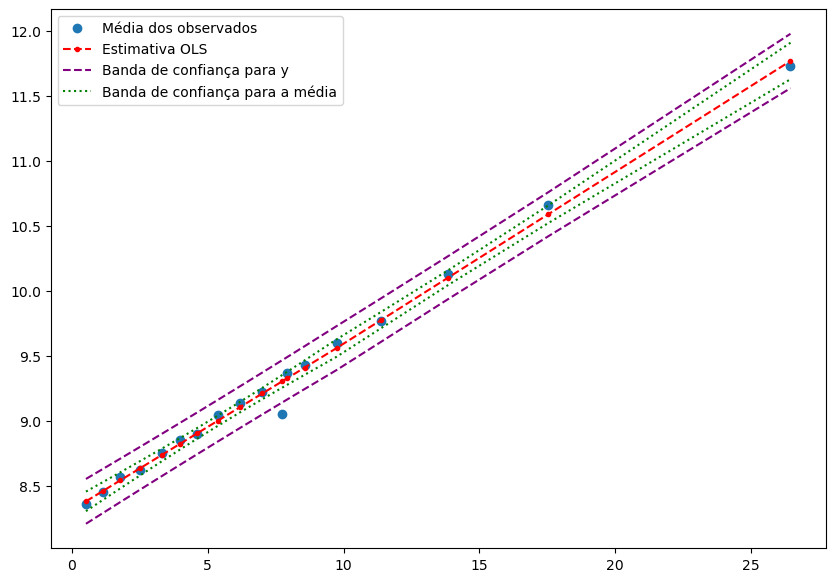

C:\Users\duduj\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        media_log_renda   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1142.
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.06e-17
Time:                        16:24:46   Log-Likelihood:                 23.278
No. Observations:                  18   AIC:                            -40.56
Df Residuals:                      15   BIC:                            -37.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3180      0.038    219.309      0.000       8.237       8.399
T_E_1          0.1277      0.006     21.248      0.000       0.115       0.140
T_E_2          0.1321      0.005     27.516      0.000       0.122       0.142
==============================================================================
Omnibus:                       36.492   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.456
Skew:                          -3.004   Prob(JB):                     1.02e-19
Kurtosis:                      11.973   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
res = smf.ols('media_log_renda ~ T_E_1 + T_E_2', data=tab).fit()
# R-quadrado
print(f'R-quadrado: {res.rsquared:.2%}')
# Plot
expected_vs_observed(data=tab)
# Sumário da regressão
res.summary()

> Utilizando as duas variáveis criadas a partir da segmentação, obtemos o mesmo valor obtido para o caso sem segmentação. Vejamos agora como o modelo se sai com apenas uma das variáveis `T_E_1`. 

##### Lowess

array([[ 0.51504158,  8.37251131],
       [ 1.12501374,  8.45529611],
       [ 1.78126076,  8.54431805],
       [ 2.51091961,  8.64331025],
       [ 3.3011802 ,  8.75038601],
       [ 3.98715635,  8.84293897],
       [ 4.61042095,  8.92530805],
       [ 5.3678288 ,  9.02436931],
       [ 6.20554575,  9.13366978],
       [ 7.00935815,  9.23825231],
       [ 7.73449962,  9.3306193 ],
       [ 7.93025702,  9.35520817],
       [ 8.57225608,  9.43627557],
       [ 9.74102435,  9.58616371],
       [11.3833561 ,  9.7998547 ],
       [13.85534639, 10.13288526],
       [17.53836507, 10.60274119],
       [26.45721236, 11.74034481]])

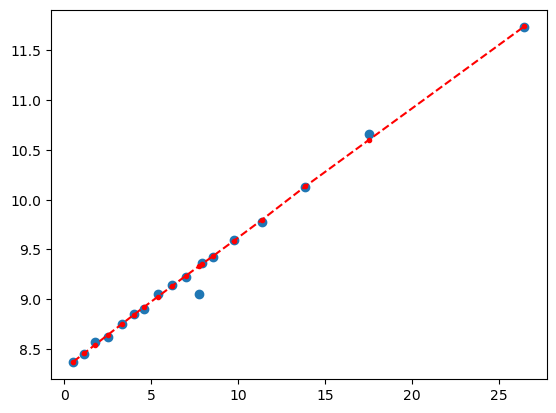

In [55]:
# Definindo a suavização dos dados na variável lowess
lowess = sm.nonparametric.lowess(tab.media_log_renda, tab.media_tempo_emprego, frac=2/3)

# Valores de y suavizados
lowess_y = lowess[:,1] # Pegando todas as linhas e a segunda coluna (y)
lowess_x = lowess[:,0]

# Gráfico
fig, ax = plt.subplots()
ax.plot(tab.media_tempo_emprego, tab.media_log_renda, 'o', label='Dados observados', alpha=1)
ax.plot(tab.media_tempo_emprego, lowess_y, 'r--.', label='Lowess');

# os dados
lowess

In [56]:
# Utilizando o lowes na regressão

f = interp1d(lowess_x, lowess_y, bounds_error=False)
# Armazenando os dados
tab['lowess_data'] = f(tab.media_tempo_emprego)
tab.head()

,count,media_log_renda,media_tempo_emprego,T_E_1,T_E_2,lowess_data
tempo_emprego_cat,,,,,,
"(0.11699999999999999, 0.816]",30234,8.364965,0.515042,0.515042,0.0,8.372511
"(0.816, 1.458]",30031,8.454323,1.125014,1.125014,0.0,8.455296
"(1.458, 2.096]",29736,8.569544,1.781261,1.781261,0.0,8.544318
"(2.096, 2.912]",30013,8.624148,2.510920,2.510920,0.0,8.643310
"(2.912, 3.636]",30408,8.755365,3.301180,3.301180,0.0,8.750386


R-quadrado: 99.33%


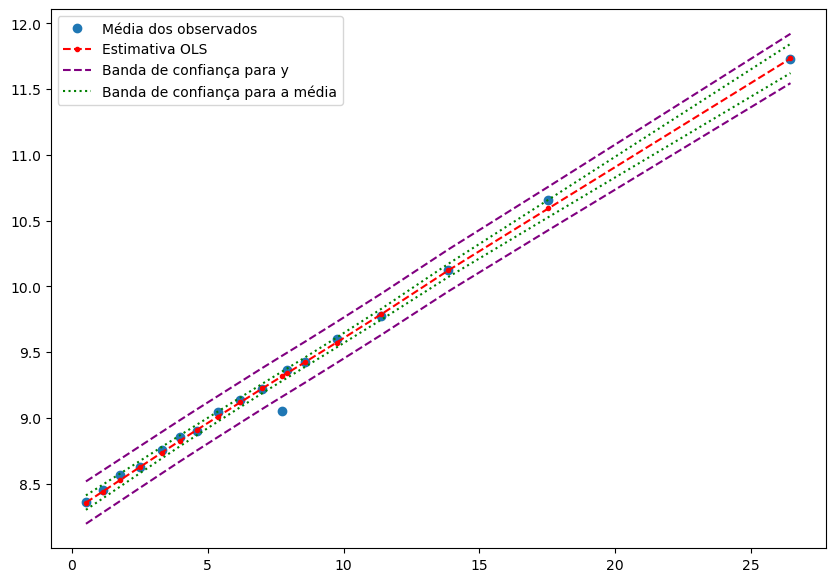

In [57]:
# Aplicando a regressão aos dados do lowess

res = smf.ols('media_log_renda ~ lowess_data', data=tab).fit()
print(f'R-quadrado: {res.rsquared:.2%}')
expected_vs_observed(data=tab)

R-quadrado: 100.00% (Modelo com overfitting)


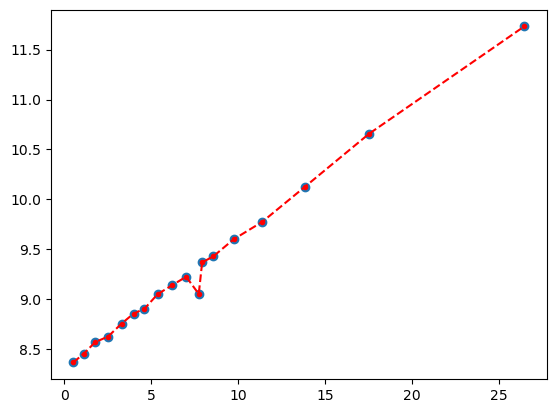

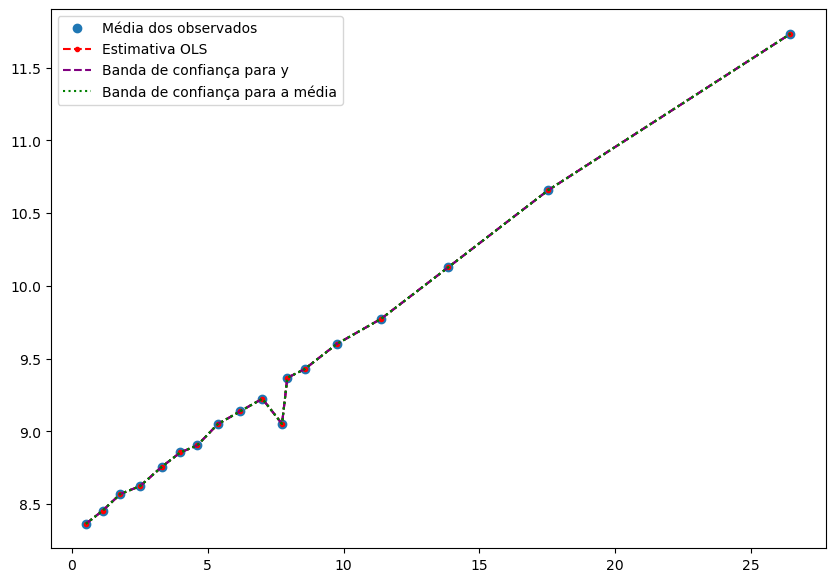

In [58]:
# Modificando o hiperparâmetro de forma exagerada, obteremos um overfitting

lowess = sm.nonparametric.lowess(tab.media_log_renda, tab.media_tempo_emprego, frac=1/10)
lowess_y = lowess[:,1]
lowess_x = lowess[:,0]

# Gráfico
fig, ax = plt.subplots()
ax.plot(tab.media_tempo_emprego, tab.media_log_renda, 'o', label='Dados observados', alpha=1)
ax.plot(tab.media_tempo_emprego, lowess_y, 'r--.', label='Lowess');

# Filtrando dados lowess
f = interp1d(lowess_x, lowess_y, bounds_error=False)
# Armazenando os dados
tab['lowess_data'] = f(tab.media_tempo_emprego)

# Aplicando a regressão aos dados do lowess
res = smf.ols('media_log_renda ~ lowess_data', data=tab).fit()
print(f'R-quadrado: {res.rsquared:.2%} (Modelo com overfitting)')
expected_vs_observed(data=tab)

## 6 - Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [60]:
df_test_original = df_test.copy()

In [61]:
df_test_original.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
600000,2016-01-01,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
600001,2016-01-01,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35
600002,2016-01-01,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
600003,2016-01-01,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
600004,2016-01-01,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03


In [62]:
# Variáveis dummy
df_teste = pd.get_dummies(df_test_original, drop_first=False)
df_teste.columns = [_.replace(' ', '_') for _ in df_teste.columns]
print(df_teste.shape)
df_teste.head()

(150000, 33)


,data_ref,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_S,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
600000,2016-01-01,0,61,7.746165,2.0,2137.61,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
600001,2016-01-01,2,27,9.301370,4.0,13884.35,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
600002,2016-01-01,3,38,10.967123,5.0,11042.47,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
600003,2016-01-01,3,35,5.553425,5.0,1333.82,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
600004,2016-01-01,0,63,9.265753,1.0,17633.03,True,False,False,True,...,False,False,False,True,False,True,False,False,False,False


In [63]:
vars = list(df_teste.columns)
vars.remove('data_ref')
vars.remove('renda')
string = ' + '.join(vars)
string

'qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + sexo_F + sexo_M + posse_de_veiculo_N + posse_de_veiculo_S + posse_de_imovel_N + posse_de_imovel_S + tipo_renda_Assalariado + tipo_renda_Bolsista + tipo_renda_Empresário + tipo_renda_Pensionista + tipo_renda_Servidor_público + educacao_Fundamental + educacao_Médio + educacao_Pós_graduação + educacao_Superior_completo + educacao_Superior_incompleto + estado_civil_Casado + estado_civil_Separado + estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + tipo_residencia_Aluguel + tipo_residencia_Casa + tipo_residencia_Com_os_pais + tipo_residencia_Comunitário + tipo_residencia_Estúdio + tipo_residencia_Governamental'

#### Regressão linear (simples)

In [65]:
reg_simple = smf.ols('renda ~'+string, data=df_teste).fit()

print(f'R-quadrado: {reg_simple.rsquared:.2%}')

reg_simple.summary()

R-quadrado: 31.80%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2913.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:48   Log-Likelihood:            -1.6972e+06
No. Observations:              150000   AIC:                         3.394e+06
Df Residuals:                  149975   BIC:                         3.395e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.088e+12   6.26e+13      0.033      0.973   -1.21e+14    1.25e+14
sexo_F[T.True]                         1.093e+12   3.27e+13      0.033      0.973   -6.31e+13    6.53e+13
sexo_M[T.True]                         1.093e+12   3.27e+13      0.033      0.973   -6.31e+13    6.53e+13
posse_de_veiculo_N[T.True]             1.096e+12   3.28e+13      0.033      0.973   -6.32e+13    6.54e+13
posse_de_veiculo_S[T.True]             1.096e+12   3.28e+13      0.033      0.973   -6.32e+13    6.54e+13
posse_de_imovel_N[T.True]              1.091e+12   3.27e+13      0.033      0.973    -6.3e+13    6.52e+13
posse_de_imovel_S[T.True]              1.091e+12   3.27e+13      0.033      0.973    -6.3e+13    6.52e+13
tipo_renda_Assalariado[T.True]        -1.547e+11   4.64e+12     -0.033      0.973   -9.24e+12    8.93e+12
tipo_renda_Bolsista[T.True]           -1.547e+11   4.64e+12     -0.033      0.973   -9.24e+12    8.93e+12
tipo_renda_Empresário[T.True]         -1.547e+11   4.64e+12     -0.033      0.973   -9.24e+12    8.93e+12
tipo_renda_Pensionista[T.True]        -1.547e+11   4.64e+12     -0.033      0.973   -9.24e+12    8.93e+12
tipo_renda_Servidor_público[T.True]   -1.547e+11   4.64e+12     -0.033      0.973   -9.24e+12    8.93e+12
educacao_Fundamental[T.True]          -2.017e+12   6.04e+13     -0.033      0.973    -1.2e+14    1.16e+14
educacao_Médio[T.True]                -2.017e+12   6.04e+13     -0.033      0.973    -1.2e+14    1.16e+14
educacao_Pós_graduação[T.True]        -2.017e+12   6.04e+13     -0.033      0.973    -1.2e+14    1.16e+14
educacao_Superior_completo[T.True]    -2.017e+12   6.04e+13     -0.033      0.973    -1.2e+14    1.16e+14
educacao_Superior_incompleto[T.True]  -2.017e+12   6.04e+13     -0.033      0.973    -1.2e+14    1.16e+14
estado_civil_Casado[T.True]           -2.035e+12    6.1e+13     -0.033      0.973   -1.22e+14    1.17e+14
estado_civil_Separado[T.True]         -2.035e+12    6.1e+13     -0.033      0.973   -1.22e+14    1.17e+14
estado_civil_Solteiro[T.True]         -2.035e+12    6.1e+13     -0.033      0.973   -1.22e+14    1.17e+14
estado_civil_União[T.True]            -2.035e+12    6.1e+13     -0.033      0.973   -1.22e+14    1.17e+14
estado_civil_Viúvo[T.True]            -2.035e+12    6.1e+13     -0.033      0.973   -1.22e+14    1.17e+14
tipo_residencia_Aluguel[T.True]       -1.161e+12   3.48e+13     -0.033      0.973   -6.93e+13     6.7e+13
tipo_residencia_Casa[T.True]          -1.161e+12   3.48e+13     -0.033      0.973   -6.93e+13     6.7e+13
tipo_residencia_Com_os_pais[T.True]   -1.161e+12   3.48e+13     -0.033      0.973   -6.93e+13     6.7e+13
tipo_residencia_Comunitário[T.True]   -1.161e+12   3.48e+13     -0.033      0.973   -6.93e+13     6.7e+13
tipo_resi

#### Regressão com transformação logarítmica da variável target

In [67]:
reg_log_test = smf.ols('np.log(renda) ~ '+string, data=df_teste).fit()

print(f'R-quadrado: {reg_log_test.rsquared:.2%}')

reg_log_test.summary()

R-quadrado: 54.79%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     7573.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:48   Log-Likelihood:            -1.6641e+05
No. Observations:              150000   AIC:                         3.329e+05
Df Residuals:                  149975   BIC:                         3.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -9.386e+08   2.31e+09     -0.406      0.685   -5.47e+09    3.59e+09
sexo_F[T.True]                        -4.914e+08   1.21e+09     -0.406      0.685   -2.86e+09    1.88e+09
sexo_M[T.True]                        -4.914e+08   1.21e+09     -0.406      0.685   -2.86e+09    1.88e+09
posse_de_veiculo_N[T.True]            -4.926e+08   1.21e+09     -0.406      0.685   -2.87e+09    1.89e+09
posse_de_veiculo_S[T.True]            -4.926e+08   1.21e+09     -0.406      0.685   -2.87e+09    1.89e+09
posse_de_imovel_N[T.True]             -4.906e+08   1.21e+09     -0.406      0.685   -2.86e+09    1.88e+09
posse_de_imovel_S[T.True]             -4.906e+08   1.21e+09     -0.406      0.685   -2.86e+09    1.88e+09
tipo_renda_Assalariado[T.True]         6.956e+07   1.71e+08      0.406      0.685   -2.66e+08    4.06e+08
tipo_renda_Bolsista[T.True]            6.956e+07   1.71e+08      0.406      0.685   -2.66e+08    4.06e+08
tipo_renda_Empresário[T.True]          6.956e+07   1.71e+08      0.406      0.685   -2.66e+08    4.06e+08
tipo_renda_Pensionista[T.True]         6.956e+07   1.71e+08      0.406      0.685   -2.66e+08    4.06e+08
tipo_renda_Servidor_público[T.True]    6.956e+07   1.71e+08      0.406      0.685   -2.66e+08    4.06e+08
educacao_Fundamental[T.True]           9.068e+08   2.23e+09      0.406      0.685   -3.47e+09    5.29e+09
educacao_Médio[T.True]                 9.068e+08   2.23e+09      0.406      0.685   -3.47e+09    5.29e+09
educacao_Pós_graduação[T.True]         9.068e+08   2.23e+09      0.406      0.685   -3.47e+09    5.29e+09
educacao_Superior_completo[T.True]     9.068e+08   2.23e+09      0.406      0.685   -3.47e+09    5.29e+09
educacao_Superior_incompleto[T.True]   9.068e+08   2.23e+09      0.406      0.685   -3.47e+09    5.29e+09
estado_civil_Casado[T.True]             9.15e+08   2.25e+09      0.406      0.685    -3.5e+09    5.33e+09
estado_civil_Separado[T.True]           9.15e+08   2.25e+09      0.406      0.685    -3.5e+09    5.33e+09
estado_civil_Solteiro[T.True]           9.15e+08   2.25e+09      0.406      0.685    -3.5e+09    5.33e+09
estado_civil_União[T.True]              9.15e+08   2.25e+09      0.406      0.685    -3.5e+09    5.33e+09
estado_civil_Viúvo[T.True]              9.15e+08   2.25e+09      0.406      0.685    -3.5e+09    5.33e+09
tipo_residencia_Aluguel[T.True]        5.219e+08   1.29e+09      0.406      0.685      -2e+09    3.04e+09
tipo_residencia_Casa[T.True]           5.219e+08   1.29e+09      0.406      0.685      -2e+09    3.04e+09
tipo_residencia_Com_os_pais[T.True]    5.219e+08   1.29e+09      0.406      0.685      -2e+09    3.04e+09
tipo_residencia_Comunitário[T.True]    5.219e+08   1.29e+09      0.406      0.685      -2e+09    3.04e+09
tipo_resi

Selecionando as variáveis explicativas mais relevantes com base no P-value.

In [69]:
reg_log_test = smf.ols('np.log(renda) ~ qtd_filhos + idade'
                       '+ tempo_emprego + qt_pessoas_residencia', data=df_teste).fit()

print(f'R-quadrado: {reg_log_test.rsquared:.2%}')

reg_log_test.summary()

R-quadrado: 52.36%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 4.122e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:49   Log-Likelihood:            -1.7033e+05
No. Observations:              150000   AIC:                         3.407e+05
Df Residuals:                  149995   BIC:                         3.407e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2454      0.012    589.042      0.000       7.221       7.270
qtd_filhos                0.0016      0.006      0.272      0.786      -0.010       0.013
idade                    -0.0042      0.000    -21.750      0.000      -0.005      -0.004
tempo_emprego             0.1313      0.000    398.411      0.000       0.131       0.132
qt_pessoas_residencia     0.0092      0.005      1.944      0.052   -7.65e-05       0.018
==============================================================================
Omnibus:                       11.832   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.142
Skew:                           0.010   Prob(JB):                      0.00231
Kurtosis:                       3.039   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regressão segmentada

In [71]:
df_teste['tempo_emprego_cat'], quebras = pd.qcut(df_teste['tempo_emprego'], 20, duplicates='drop', retbins=True)
df_teste.loc[:,'log_renda'] = np.log(df_teste.renda)
df_teste.head()

,data_ref,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_S,...,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,tempo_emprego_cat,log_renda
600000,2016-01-01,0,61,7.746165,2.0,2137.61,True,False,True,False,...,False,False,False,True,False,False,False,False,"(7.474, 7.746]",7.667444
600001,2016-01-01,2,27,9.301370,4.0,13884.35,True,False,True,False,...,False,False,False,True,False,False,False,False,"(9.101, 10.471]",9.538518
600002,2016-01-01,3,38,10.967123,5.0,11042.47,True,False,False,True,...,False,False,False,True,False,False,False,False,"(10.471, 12.474]",9.309504
600003,2016-01-01,3,35,5.553425,5.0,1333.82,False,True,False,True,...,False,False,False,True,False,False,False,False,"(4.945, 5.759]",7.195802
600004,2016-01-01,0,63,9.265753,1.0,17633.03,True,False,False,True,...,False,True,False,True,False,False,False,False,"(9.101, 10.471]",9.777529


In [72]:
# valor de corte
C1 = 8

# Criando uma tabela com valores médios 
tab_teste = pd.DataFrame()
tab_teste['count'] = df_teste.tempo_emprego_cat.value_counts()
df_train.loc[:,'log_renda'] = np.log(df_teste.renda)
tab_teste['media_log_renda'] = df_teste.groupby('tempo_emprego_cat', observed=False)['log_renda'].mean()
tab_teste['media_tempo_emprego'] = df_teste.groupby('tempo_emprego_cat', observed=False)['tempo_emprego'].mean()
tab_teste.sort_index(inplace=True)
tab_teste['T_E_1'] = (tab_teste.media_tempo_emprego<=C1)*tab_teste.media_tempo_emprego + (tab_teste.media_tempo_emprego>C1)*C1
tab_teste['T_E_2'] = (tab_teste.media_tempo_emprego<=C1)* 0 + (tab_teste.media_tempo_emprego>C1)*(tab_teste.media_tempo_emprego - C1)

tab_teste

,count,media_log_renda,media_tempo_emprego,T_E_1,T_E_2
tempo_emprego_cat,,,,,
"(0.11699999999999999, 0.827]",7601,7.202604,0.520903,0.520903,0.000000
"(0.827, 1.468]",7464,7.257080,1.134215,1.134215,0.000000
"(1.468, 2.099]",7459,7.401755,1.790156,1.790156,0.000000
"(2.099, 2.912]",7511,7.472002,2.514075,2.514075,0.000000
"(2.912, 3.636]",7507,7.578685,3.299975,3.299975,0.000000
"(3.636, 4.304]",7545,7.660521,3.994033,3.994033,0.000000
"(4.304, 4.945]",7420,7.734648,4.624617,4.624617,0.000000
"(4.945, 5.759]",7509,7.857738,5.370319,5.370319,0.000000
"(5.759, 6.622]",7492,7.969381,6.203618,6.203618,0.000000


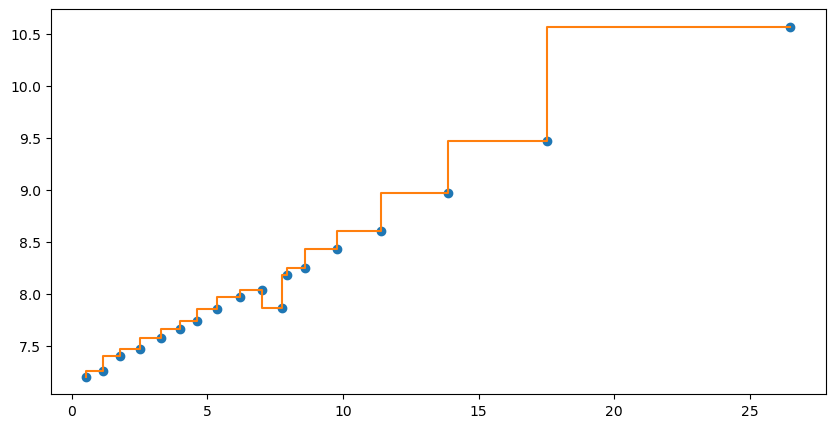

In [73]:
fig, ax = plt.subplots(figsize=[10,5])

ax.plot(tab_teste.media_tempo_emprego, tab_teste.media_log_renda, 'o')
ax.step(tab_teste.media_tempo_emprego, tab_teste.media_log_renda);

Uma vez que as médias retornam uma tendência linear, em princípio, não seria necessária a utilização de uma regressão por segmentação, uma regressão simples seria capaz de gerar bons resultados, mas para ilustrar segue a regressão segmentada.

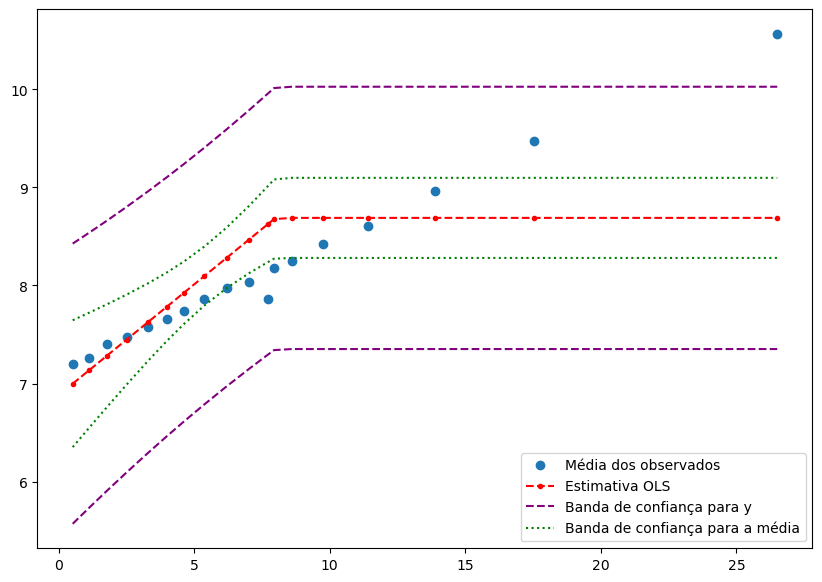

C:\Users\duduj\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        media_log_renda   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     17.79
Date:                Wed, 28 May 2025   Prob (F-statistic):           0.000654
Time:                        16:24:49   Log-Likelihood:                -15.311
No. Observations:                  18   AIC:                             34.62
Df Residuals:                      16   BIC:                             36.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8806      0.330     20.839      0.000       6.181       7.581
T_E_1          0.2261      0.054      4.218      0.001       0.112       0.340
==============================================================================
Omnibus:                       20.590   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.268
Skew:                           1.931   Prob(JB):                     5.37e-06
Kurtosis:                       7.176   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Considerando apenas uma das variáveis da segmentação 
res = smf.ols('media_log_renda ~ T_E_1 ', data=tab_teste).fit()
expected_vs_observed(data=tab_teste)
res.summary()

R-quadrado: 99.36%


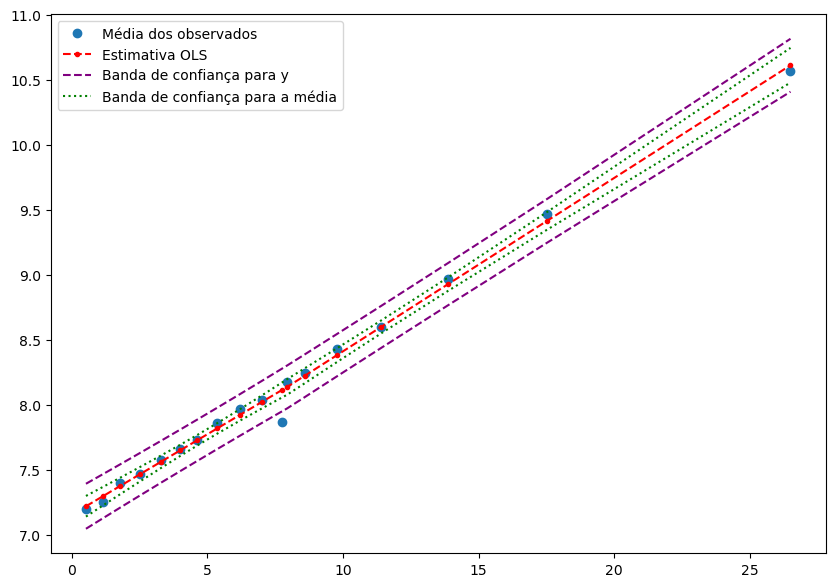

C:\Users\duduj\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        media_log_renda   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1165.
Date:                Wed, 28 May 2025   Prob (F-statistic):           3.50e-17
Time:                        16:24:49   Log-Likelihood:                 23.432
No. Observations:                  18   AIC:                            -40.86
Df Residuals:                      15   BIC:                            -38.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1571      0.040    176.731      0.000       7.071       7.243
T_E_1          0.1236      0.007     17.315      0.000       0.108       0.139
T_E_2          0.1332      0.004     33.103      0.000       0.125       0.142
==============================================================================
Omnibus:                       34.656   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.740
Skew:                          -2.889   Prob(JB):                     3.57e-17
Kurtosis:                      11.222   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Considerando as duas variáveis da segmentação

res = smf.ols('media_log_renda ~ T_E_1 + T_E_2 ', data=tab_teste).fit()
print(f'R-quadrado: {res.rsquared:.2%}')
expected_vs_observed(data=tab_teste)
res.summary()

#### Lowess

R-quadrado: 99.34%


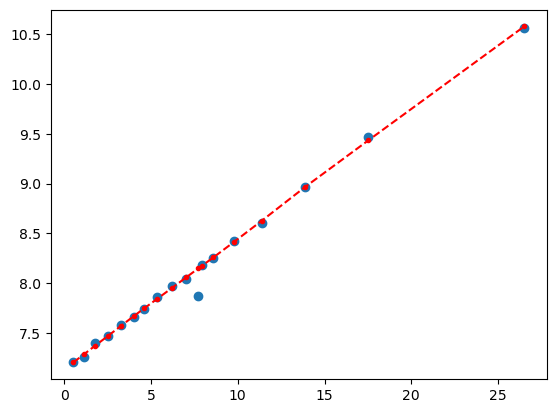

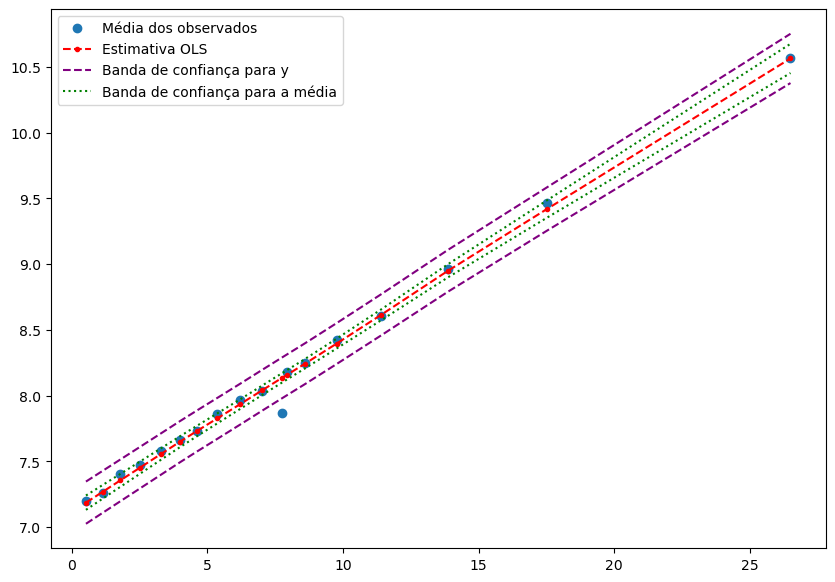

In [78]:
lowess = sm.nonparametric.lowess(tab_teste.media_log_renda, tab_teste.media_tempo_emprego, frac=2/3)
lowess_y = lowess[:,1]
lowess_x = lowess[:,0]

# Gráfico
fig, ax = plt.subplots()
ax.plot(tab_teste.media_tempo_emprego, tab_teste.media_log_renda, 'o', label='Dados observados', alpha=1)
ax.plot(tab_teste.media_tempo_emprego, lowess_y, 'r--.', label='Lowess');

# Filtrando dados lowess
f = interp1d(lowess_x, lowess_y, bounds_error=False)
# Armazenando os dados
tab_teste['lowess_data'] = f(tab_teste.media_tempo_emprego)

# Aplicando a regressão aos dados do lowess
reg_lowess = smf.ols('media_log_renda ~ lowess_data', data=tab_teste).fit() 
res = smf.ols('media_log_renda ~ lowess_data', data=tab_teste).fit()
print(f'R-quadrado: {res.rsquared:.2%}')
expected_vs_observed(data=tab_teste)

In [79]:
# Tabela
tab_teste.head()

,count,media_log_renda,media_tempo_emprego,T_E_1,T_E_2,lowess_data
tempo_emprego_cat,,,,,,
"(0.11699999999999999, 0.827]",7601,7.202604,0.520903,0.520903,0.0,7.202090
"(0.827, 1.468]",7464,7.257080,1.134215,1.134215,0.0,7.284110
"(1.468, 2.099]",7459,7.401755,1.790156,1.790156,0.0,7.371671
"(2.099, 2.912]",7511,7.472002,2.514075,2.514075,0.0,7.468313
"(2.912, 3.636]",7507,7.578685,3.299975,3.299975,0.0,7.573402


#### Conclusão

In [81]:
# Sumário
reg_simple = smf.ols('renda ~'+string, data=df_teste).fit()
reg_log_test = smf.ols('np.log(renda) ~ '+string, data=df_teste).fit()
reg_seg = smf.ols('media_log_renda ~ T_E_1 + T_E_2 ', data=tab_teste).fit()
reg_lowess = smf.ols('media_log_renda ~ lowess_data', data=tab_teste).fit() 

**Com base nas regressões implementadas obtivemos:**

In [83]:
print('Para a regressão simples temos:')
print(f'--> R-quadrado: {reg_simple.rsquared:.2%}')
print(f'--> R-quadrado ajustado: {reg_simple.rsquared_adj:.2%} \n')

print('Para a regressão com transformação logrítmica temos:')
print(f'--> R-quadrado: {reg_log_test.rsquared:.2%}')
print(f'--> R-quadrado ajustado: {reg_log_test.rsquared_adj:.2%}\n')

print(' ## As próximas duas regressões foram feitas com relação às médias dos valores originais ##\n')

print('Para a regressão segmentada temos:')
print(f'--> R-quadrado: {reg_seg.rsquared:.2%}')
print(f'--> R-quadrado ajustado: {reg_seg.rsquared_adj:.2%}\n')

print('Para a regressão a partir do Lowess temos:')
print(f'--> R-quadrado: {reg_lowess.rsquared:.2%}')
print(f'--> R-quadrado ajustado: {reg_lowess.rsquared_adj:.2%}')

Para a regressão simples temos:
--> R-quadrado: 31.80%
--> R-quadrado ajustado: 31.79% 

Para a regressão com transformação logrítmica temos:
--> R-quadrado: 54.79%
--> R-quadrado ajustado: 54.78%

 ## As próximas duas regressões foram feitas com relação às médias dos valores originais ##

Para a regressão segmentada temos:
--> R-quadrado: 99.36%
--> R-quadrado ajustado: 99.28%

Para a regressão a partir do Lowess temos:
--> R-quadrado: 99.34%
--> R-quadrado ajustado: 99.29%


É interessante notar como o Lowess é capaz de fornecer uma regressão com bons resultados, porém ela traz uma sensação de falta de controle, ou seja, não sabemos a fundo como o processo está sendo realizado. A regressão segmentada, por sua vez, é capaz de fornecer excelentes resultados e para calibrá-la é necessário que ajustemos o modelo a mão, isso traz um controle interessante sobre o ajuste.